In [29]:
import numpy as np
with open('X_test.npy', 'rb') as f:
    X_test = np.load(f)
with open('y_test.npy', 'rb') as f:
    y_test = np.load(f)
with open('X_train.npy', 'rb') as f:c
    X_train = np.load(f)
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv1D, MaxPool1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
import pandas as pd
class_num = 7
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))
print(y_test.shape, y_train.shape, X_test.shape, X_train.shape)

(1636, 7) (3808, 7) (1636, 13) (3808, 13)


In [32]:
model = Sequential()
model.add(Conv1D(16, 3, activation='relu',strides=1, padding='same', input_shape=(13,1)))
model.add(Conv1D(32, 3, activation='relu', strides=1, padding='same'))
model.add(Conv1D(64, 3, activation='relu', strides=1, padding='same'))
model.add(Conv1D(128, 3, activation='relu', strides=1, padding='same'))

model.add(MaxPool1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [33]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 13, 16)            64        
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 32)            1568      
                                                                 
 conv1d_6 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 128)            0         
                                                      

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_1.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
108/119 [==========================>...] - ETA: 0s - loss: 1.9634 - accuracy: 0.4144
Epoch 1: val_loss improved from inf to 0.75270, saving model to saved_models/audio_classification_1.hdf5
119/119 [==============================] - 1s 6ms/step - loss: 1.8755 - accuracy: 0.4359 - val_loss: 0.7527 - val_accuracy: 0.7139
Epoch 2/100
106/119 [=========================>....] - ETA: 0s - loss: 0.7288 - accuracy: 0.7229
Epoch 2: val_loss improved from 0.75270 to 0.38043, saving model to saved_models/audio_classification_1.hdf5
119/119 [==============================] - 1s 4ms/step - loss: 0.7061 - accuracy: 0.7321 - val_loss: 0.3804 - val_accuracy: 0.8643
Epoch 3/100
104/119 [=========================>....] - ETA: 0s - loss: 0.4504 - accuracy: 0.8320
Epoch 3: val_loss improved from 0.38043 to 0.29846, saving model to saved_models/audio_classification_1.hdf5
119/119 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8369 - val_loss: 0.2985 - val_accuracy: 

Epoch 28/100
110/119 [==========================>...] - ETA: 0s - loss: 0.0865 - accuracy: 0.9662
Epoch 28: val_loss did not improve from 0.12824
119/119 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9648 - val_loss: 0.1415 - val_accuracy: 0.9535
Epoch 29/100
111/119 [==========================>...] - ETA: 0s - loss: 0.0696 - accuracy: 0.9752
Epoch 29: val_loss did not improve from 0.12824
119/119 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9745 - val_loss: 0.1419 - val_accuracy: 0.9590
Epoch 30/100
115/119 [===========================>..] - ETA: 0s - loss: 0.0823 - accuracy: 0.9717
Epoch 30: val_loss did not improve from 0.12824
119/119 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9716 - val_loss: 0.1774 - val_accuracy: 0.9480
Epoch 31/100
112/119 [===========================>..] - ETA: 0s - loss: 0.0805 - accuracy: 0.9735
Epoch 31: val_loss did not improve from 0.12824
119/119 [==============

Epoch 57/100
107/119 [=========================>....] - ETA: 0s - loss: 0.0467 - accuracy: 0.9857
Epoch 57: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9858 - val_loss: 0.1333 - val_accuracy: 0.9670
Epoch 58/100
114/119 [===========================>..] - ETA: 0s - loss: 0.0338 - accuracy: 0.9888
Epoch 58: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.1316 - val_accuracy: 0.9658
Epoch 59/100
111/119 [==========================>...] - ETA: 0s - loss: 0.0417 - accuracy: 0.9848
Epoch 59: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9850 - val_loss: 0.1398 - val_accuracy: 0.9639
Epoch 60/100
111/119 [==========================>...] - ETA: 0s - loss: 0.0350 - accuracy: 0.9873
Epoch 60: val_loss did not improve from 0.10341
119/119 [==============

Epoch 87/100
116/119 [============================>.] - ETA: 0s - loss: 0.0344 - accuracy: 0.9865
Epoch 87: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9869 - val_loss: 0.1240 - val_accuracy: 0.9713
Epoch 88/100
102/119 [========================>.....] - ETA: 0s - loss: 0.0318 - accuracy: 0.9890
Epoch 88: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9884 - val_loss: 0.1454 - val_accuracy: 0.9719
Epoch 89/100
108/119 [==========================>...] - ETA: 0s - loss: 0.0392 - accuracy: 0.9870
Epoch 89: val_loss did not improve from 0.10341
119/119 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.1208 - val_accuracy: 0.9694
Epoch 90/100
110/119 [==========================>...] - ETA: 0s - loss: 0.0318 - accuracy: 0.9886
Epoch 90: val_loss did not improve from 0.10341
119/119 [==============

In [35]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9682151675224304


In [36]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(y_pred.shape)

52/52 [==============================] - 0s 2ms/step
(1636,)


In [37]:
y_test = np.argmax(y_test, axis=1)
print(y_test.shape)

(1636,)


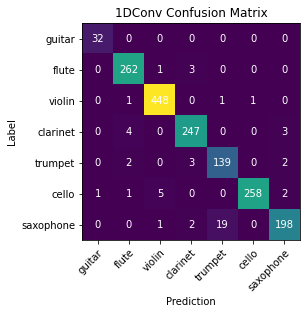

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
instrument_families = ['guitar','flute','violin','clarinet','trumpet','cello','saxophone']
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()


ax.matshow(confusion_mtx)
ax.set_xticks(np.arange(len(instrument_families)), labels=instrument_families)
ax.set_yticks(np.arange(len(instrument_families)), labels=instrument_families)

for i in range(7):
    for j in range(7):
        text = ax.text(j, i, confusion_mtx.numpy()[i, j],
                       ha="center", va="center", color="w")

ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.xlabel('Prediction')
plt.ylabel('Label')

ax.set_title("1DConv Confusion Matrix")
plt.show()


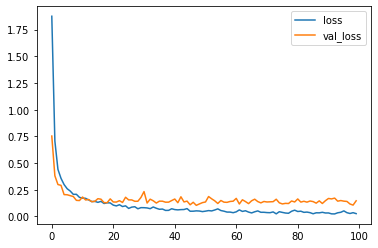

In [41]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


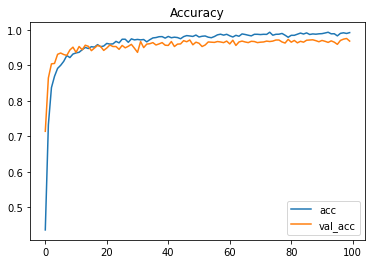

In [48]:
plt.title('Accuracy')
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

In [46]:
print(metrics.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
